# Looking at Race in Los Angeles  

In the following lab I took data from census reporter about the without “hispanic/latino” as a race-like category. Once uploaded, I looked at the data I was working with to see if anything needed to be change.To make it clear I cut some of the columns I did not need, and rename them to math the categories used in the census. After that, I made sure that the data was still correct by running some math proofs. Later I explore different maps including the 15 census tract with highes Asian alone population. I then coverted the raw data to percent of total values to get a more clear view of the data. Once the data was converted to percent of totals, I mapped Asian alone and American Indian and Alaska Native alone. With this I also change the colors of both. Finally, I created a map that included a mase map to show census tracts with 70% Asian alone population and a simalr map to show 50% Black or African alone. The goal with this information is to use it with it bike crashes and bike lane infastructure to see if communities of color have less bike lanes that make them more susceptiple to bike incidents.

Here are the different commands that we will need in order to work with the data we got from the Census. 

The panda allows for data wrangling tasks, geopandas to read and visualize spatial data, contextily to provide basemaps, and matplotlib.pyplot to give more power to figures.

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


Next, I will create a relative path refrence to use the data I got from the census reporter.

In [2]:
gdf = gpd.read_file('data/acs2019_5yr_B02001_14000US06037222001.geojson')

### Taking a Look at the Data

First, I will look at the size of the datta by using .shape.

In [3]:
gdf.shape

(1005, 23)

Then, I will look at the first 5 rows of my data, to get an idea of how it looks. 

In [4]:
gdf.head()

,geoid,name,B02001001,"B02001001, Error",B02001002,"B02001002, Error",B02001003,"B02001003, Error",B02001004,"B02001004, Error",...,"B02001006, Error",B02001007,"B02001007, Error",B02001008,"B02001008, Error",B02001009,"B02001009, Error",B02001010,"B02001010, Error",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,443.0,3347.0,353.0,19.0,15.0,3.0,6.0,...,6.0,391.0,312.0,189.0,85.0,34.0,28.0,155.0,83.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,334.0,2981.0,343.0,74.0,102.0,15.0,24.0,...,12.0,48.0,55.0,67.0,65.0,0.0,12.0,67.0,65.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,484.0,4647.0,612.0,198.0,165.0,0.0,17.0,...,17.0,921.0,507.0,95.0,83.0,48.0,62.0,47.0,56.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,276.0,2634.0,337.0,87.0,107.0,0.0,12.0,...,12.0,497.0,231.0,143.0,87.0,11.0,18.0,132.0,86.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,394.0,3350.0,394.0,205.0,232.0,0.0,12.0,...,12.0,45.0,38.0,90.0,55.0,28.0,32.0,62.0,44.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


To see what it looks like, next I will plot it. This gives us an outline of LA city, which is the data where I am working from. 

<AxesSubplot:>

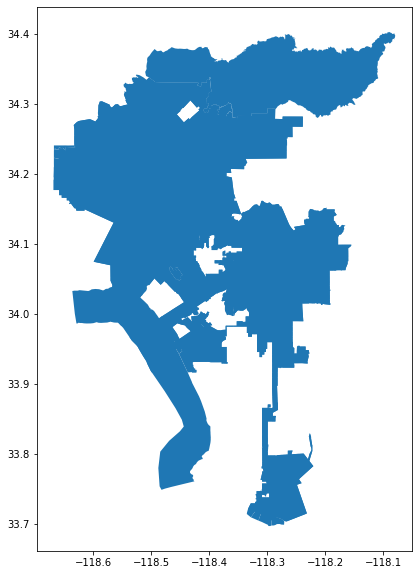

In [5]:
gdf.plot(figsize=(10,10))

Next, I will look at my data types.

In [6]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             1005 non-null   object  
 1   name              1005 non-null   object  
 2   B02001001         1005 non-null   float64 
 3   B02001001, Error  1005 non-null   float64 
 4   B02001002         1005 non-null   float64 
 5   B02001002, Error  1005 non-null   float64 
 6   B02001003         1005 non-null   float64 
 7   B02001003, Error  1005 non-null   float64 
 8   B02001004         1005 non-null   float64 
 9   B02001004, Error  1005 non-null   float64 
 10  B02001005         1005 non-null   float64 
 11  B02001005, Error  1005 non-null   float64 
 12  B02001006         1005 non-null   float64 
 13  B02001006, Error  1005 non-null   float64 
 14  B02001007         1005 non-null   float64 
 15  B02001007, Error  1005 non-null   float64 
 16  B02001008       

### Cutting Columns I do not need.
             

First, I am going to see the name of the list that I currently have. 

In [7]:
list(gdf)

['geoid',
 'name',
 'B02001001',
 'B02001001, Error',
 'B02001002',
 'B02001002, Error',
 'B02001003',
 'B02001003, Error',
 'B02001004',
 'B02001004, Error',
 'B02001005',
 'B02001005, Error',
 'B02001006',
 'B02001006, Error',
 'B02001007',
 'B02001007, Error',
 'B02001008',
 'B02001008, Error',
 'B02001009',
 'B02001009, Error',
 'B02001010',
 'B02001010, Error',
 'geometry']

Next, I am going to say which of the columns I want to keep.

In [8]:
columns_to_keep = ['geoid',
'name',
'B02001001',
'B02001002',
'B02001003',
'B02001004',
'B02001005',
'B02001006',
'B02001007',
'B02001008',
'B02001009',
'B02001010',
'geometry']

With the change, I will redifine gdf with only the columns to keep.

In [9]:
gdf = gdf[columns_to_keep]

To show the changes have been made with the changes that we want, I will use .head() to see that the columns I wanted to keep are the only ones showing up.

In [10]:
gdf.head()

,geoid,name,B02001001,B02001002,B02001003,B02001004,B02001005,B02001006,B02001007,B02001008,B02001009,B02001010,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3347.0,19.0,3.0,331.0,3.0,391.0,189.0,34.0,155.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,2981.0,74.0,15.0,220.0,0.0,48.0,67.0,0.0,67.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,4647.0,198.0,0.0,486.0,0.0,921.0,95.0,48.0,47.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2634.0,87.0,0.0,341.0,0.0,497.0,143.0,11.0,132.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3350.0,205.0,0.0,194.0,0.0,45.0,90.0,28.0,62.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


### Renaming the Columns
To make it easier to read and undertstand I will rename the columns so it matches the census description.

1) I am going to create a list of column names as they are label in the data as they are now.

In [11]:
list(gdf)

['geoid',
 'name',
 'B02001001',
 'B02001002',
 'B02001003',
 'B02001004',
 'B02001005',
 'B02001006',
 'B02001007',
 'B02001008',
 'B02001009',
 'B02001010',
 'geometry']

2. Using the output, I will use it to replace the current names to the ones use in the census.

In [12]:
gdf.columns = ['geoid',
'name',
'Total',
'White alone',
'Black of African alone',
'American Indian and Alaska Native alone',
'Asian alone',
'Native Hawaiian and Other Pacific Islander alone',
'Some other race alone',
'Two or more races',
'Two races including Some other race',
'Two races excluding Some other race and three or more races',
'geometry']



3. Check that the column names have change.

In [13]:
gdf.head()

,geoid,name,Total,White alone,Black of African alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Two races including Some other race,Two races excluding Some other race and three or more races,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3347.0,19.0,3.0,331.0,3.0,391.0,189.0,34.0,155.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,2981.0,74.0,15.0,220.0,0.0,48.0,67.0,0.0,67.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,4647.0,198.0,0.0,486.0,0.0,921.0,95.0,48.0,47.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2634.0,87.0,0.0,341.0,0.0,497.0,143.0,11.0,132.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3350.0,205.0,0.0,194.0,0.0,45.0,90.0,28.0,62.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


### Cheking that the dat is correct

1. Get random tract.

In [14]:
random_tract = gdf.sample()
random_tract

,geoid,name,Total,White alone,Black of African alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Two races including Some other race,Two races excluding Some other race and three or more races,geometry
969,14000US06037296220,"Census Tract 2962.20, Los Angeles, CA",4447.0,1407.0,606.0,21.0,422.0,21.0,1798.0,172.0,16.0,156.0,"MULTIPOLYGON (((-118.28790 33.73876, -118.2879..."


2. Make sure the math checks out by making sure all the columns add up to the total. First I used iloc to get the total polation of my random tract.

In [15]:
random_tract.iloc[0]['Total']

4447.0

3. Use the following to print it out in plain english.

In [16]:
print('Total population: ' + str(random_tract.iloc[0]['Total']))

Total population: 4447.0


4. Add up all the comluns to make sure they add up to the total.

In [17]:
print(random_tract.iloc[0]['White alone'] + 
      random_tract.iloc[0]['Black of African alone'] + 
      random_tract.iloc[0]['American Indian and Alaska Native alone'] + 
      random_tract.iloc[0]['Asian alone'] + 
      random_tract.iloc[0]['Native Hawaiian and Other Pacific Islander alone'] + 
      random_tract.iloc[0]['Some other race alone'] + 
      random_tract.iloc[0]['Two or more races'] + 
      random_tract.iloc[0]['Two races including Some other race'] + 
      random_tract.iloc[0]['Two races excluding Some other race and three or more races'])

4619.0


To get a summary of the statistics of the data I will use .describe

In [18]:
gdf['Total'].describe()

count    1.005000e+03
mean     7.900301e+03
std      1.250157e+05
min      0.000000e+00
25%      3.030000e+03
50%      3.804000e+03
75%      4.790000e+03
max      3.966936e+06
Name: Total, dtype: float64

Next I will be looking at the top 15 census tracks that has the asian only population.

In [22]:
gdf_sorted = gdf.sort_values(by='Asian alone',ascending = False)

Once I defined it to only get Asian alone population, I used .head(15) to see the list of the top 15 census tract with Asian alone population

In [23]:
gdf_sorted[['geoid','Asian alone']].head(15)

,geoid,Asian alone
1004,16000US0644000,460942.0
847,14000US06037265301,4833.0
65,14000US06037108202,3607.0
577,14000US06037211120,3421.0
922,14000US06037275602,2818.0
591,14000US06037211803,2586.0
64,14000US06037108201,2575.0
556,14000US06037208710,2501.0
546,14000US06037207900,2359.0
609,14000US06037212610,2332.0


Here is a map of the top 15 census tract with Asian alone population

<AxesSubplot:>

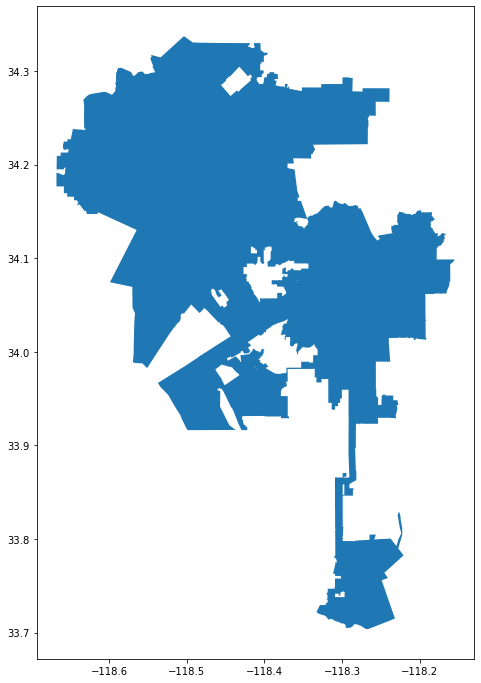

In [25]:
gdf_sorted.head(15).plot(figsize=(12,12))

Next, I am changing the colors and adding a leged to make reading the map easier. 

<AxesSubplot:>

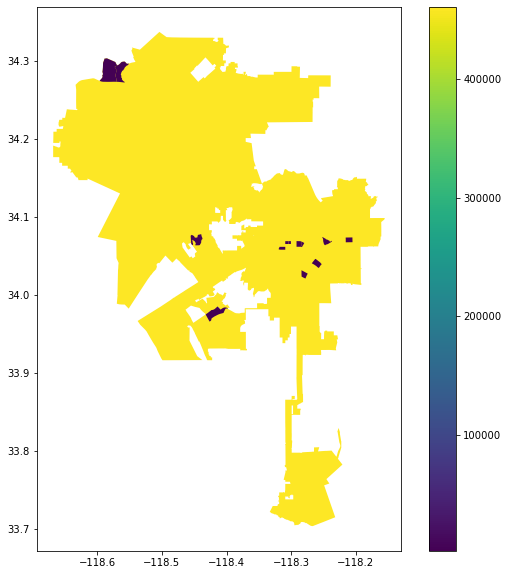

In [27]:
gdf_sorted.head(15).plot(figsize=(10,10),
                          column='Asian alone',
                          legend=True)

### Normalizing the Data

1. I am going to use list() to see the names of my columns 

In [28]:
list(gdf)

['geoid',
 'name',
 'Total',
 'White alone',
 'Black of African alone',
 'American Indian and Alaska Native alone',
 'Asian alone',
 'Native Hawaiian and Other Pacific Islander alone',
 'Some other race alone',
 'Two or more races',
 'Two races including Some other race',
 'Two races excluding Some other race and three or more races',
 'geometry']

2. Using the list with the names, I will covert the raw totals into percent of total values

In [32]:
gdf['Percent White alone'] = gdf['White alone']/gdf['Total']*100
gdf['Percent Black of African alone'] = gdf['Black of African alone']/gdf['Total']*100
gdf['Percent American Indian and Alaska Native alone'] = gdf['American Indian and Alaska Native alone']/gdf['Total']*100
gdf['Percent Asian alone'] = gdf['Asian alone']/gdf['Total']*100
gdf['Percent Native Hawaiian and Other Pacific Islander alone'] = gdf['Native Hawaiian and Other Pacific Islander alone']/gdf['Total']*100
gdf['Percent Some other race alone'] = gdf['Some other race alone']/gdf['Total']*100
gdf['Percent Two races including Some other race'] = gdf['Two races including Some other race']/gdf['Total']*100
gdf['Percent Two races excluding Some other race and three or more races'] = gdf['Two races excluding Some other race and three or more races']/gdf['Total']*100

3) I am going to run a random sample of 5, to see the new totals.

In [33]:
gdf.sample (5)

,geoid,name,Total,White alone,Black of African alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,...,Two races excluding Some other race and three or more races,geometry,Percent White alone,Percent Black of African alone,Percent American Indian and Alaska Native alone,Percent Asian alone,Percent Native Hawaiian and Other Pacific Islander alone,Percent Some other race alone,Percent Two races including Some other race,Percent Two races excluding Some other race and three or more races
937,14000US06037291110,"Census Tract 2911.10, Los Angeles, CA",4391.0,1137.0,2081.0,25.0,20.0,0.0,1100.0,28.0,...,7.0,"MULTIPOLYGON (((-118.29160 33.91755, -118.2916...",25.893874,47.392394,0.569346,0.455477,0.0,25.051241,0.478251,0.159417
462,14000US06037195100,"Census Tract 1951, Los Angeles, CA",4978.0,3635.0,123.0,24.0,692.0,0.0,114.0,390.0,...,320.0,"MULTIPOLYGON (((-118.27691 34.09584, -118.2768...",73.021294,2.470872,0.482121,13.901165,0.0,2.290076,1.406187,6.428284
928,14000US06037276601,"Census Tract 2766.01, Los Angeles, CA",4115.0,2979.0,224.0,0.0,593.0,0.0,37.0,282.0,...,265.0,"MULTIPOLYGON (((-118.44538 33.96075, -118.4447...",72.393682,5.443499,0.000000,14.410693,0.0,0.899149,0.413123,6.439854
760,14000US06037236100,"Census Tract 2361, Los Angeles, CA",6170.0,1260.0,3758.0,0.0,498.0,0.0,525.0,129.0,...,129.0,"MULTIPOLYGON (((-118.34864 34.01163, -118.3485...",20.421394,60.907618,0.000000,8.071313,0.0,8.508914,0.000000,2.090762
271,14000US06037134002,"Census Tract 1340.02, Los Angeles, CA",3665.0,1999.0,143.0,29.0,429.0,0.0,1033.0,32.0,...,32.0,"MULTIPOLYGON (((-118.58848 34.20831, -118.5879...",54.542974,3.901774,0.791269,11.705321,0.0,28.185539,0.000000,0.873124


The following will show a map for Asian alone, using equal interval scheme.

<AxesSubplot:>

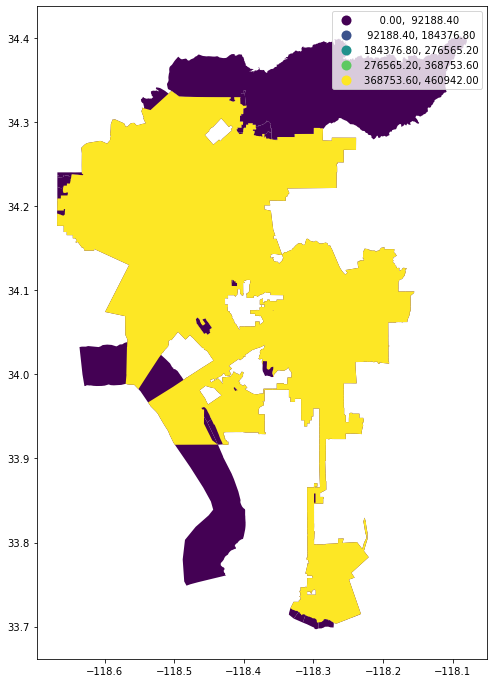

In [55]:
gdf.plot(figsize=(12,12),
                 column='Asian alone',
                 legend=True, 
                 scheme='equal_interval')

Next, I will do the same for American Indian and Alaska Native alone and see a map for it.

<AxesSubplot:>

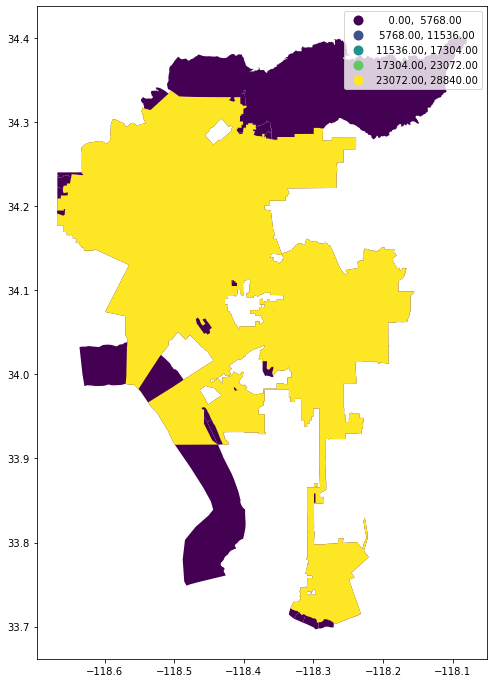

In [41]:
gdf.plot(figsize=(12,12),
                 column='American Indian and Alaska Native alone',
                 legend=True, 
                 scheme='equal_interval')

Now I am doing the Asian alone, but changing the color scheme of it. 

<AxesSubplot:>

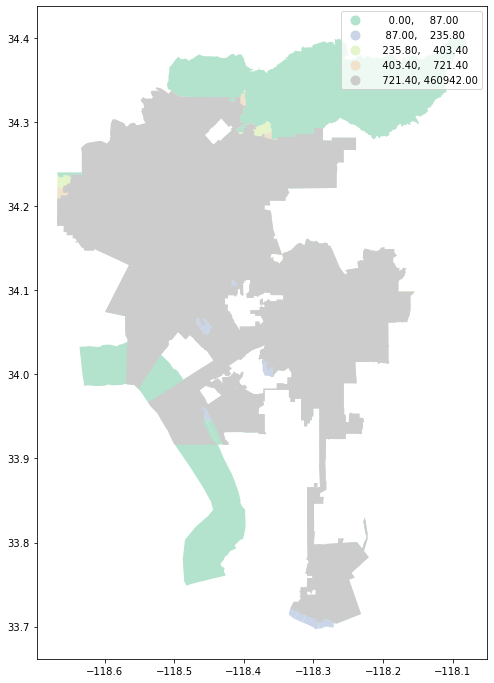

In [58]:
gdf.plot(figsize=(12,12),
                 column='Asian alone',
                 legend=True, 
                 scheme='quantiles',
                 cmap='Pastel2'
        )


Below is the same map but with costume breaks 

<AxesSubplot:>

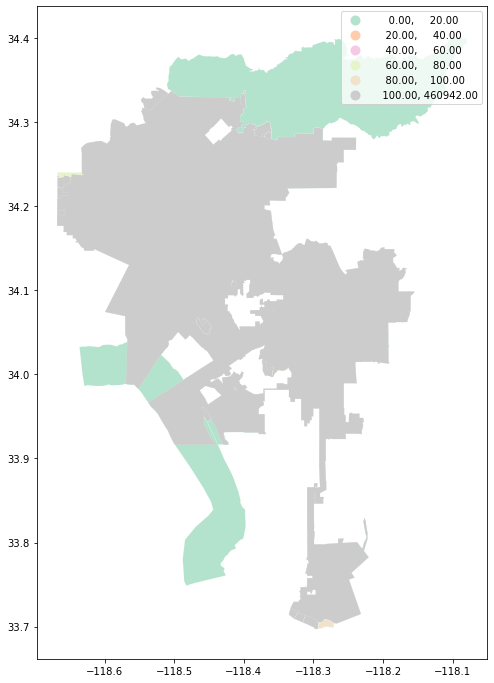

In [68]:
gdf.plot(figsize=(12,12),
            column='Asian alone', 
            cmap='Pastel2', 
            scheme='user_defined', 
            classification_kwds={'bins':[20,40,60,80,100]}, 
            edgecolor='white', 
            linewidth=0.1, 
            legend=True
           )

Next, I will be adding a base map for my previous map.

In [69]:
gdf_web_mercator = gdf.to_crs(epsg=3857)

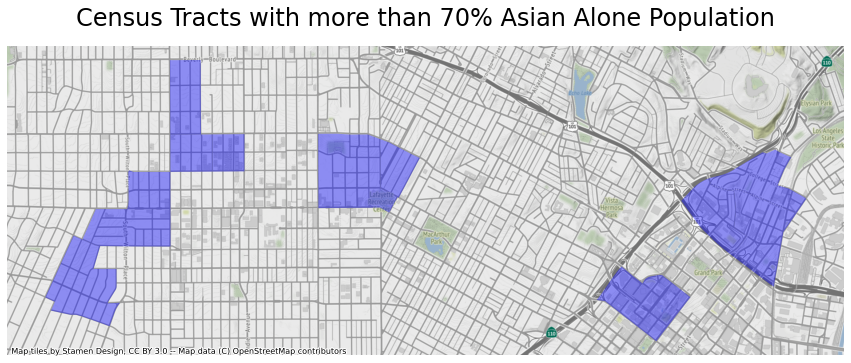

In [77]:
fig, ax = plt.subplots(figsize=(15, 15))

gdf_web_mercator[gdf_web_mercator['Percent Asian alone'] > 50].plot(
                                                               ax=ax, 
                                                               color="blue",
                                                               alpha=0.4
)

ax.axis('off')

ax.set_title('Census Tracts with more than 70% Asian Alone Population',fontsize=24,pad=20)

ctx.add_basemap(ax)

I will be mapping the same map but for Black of African alone, and a different basemap.

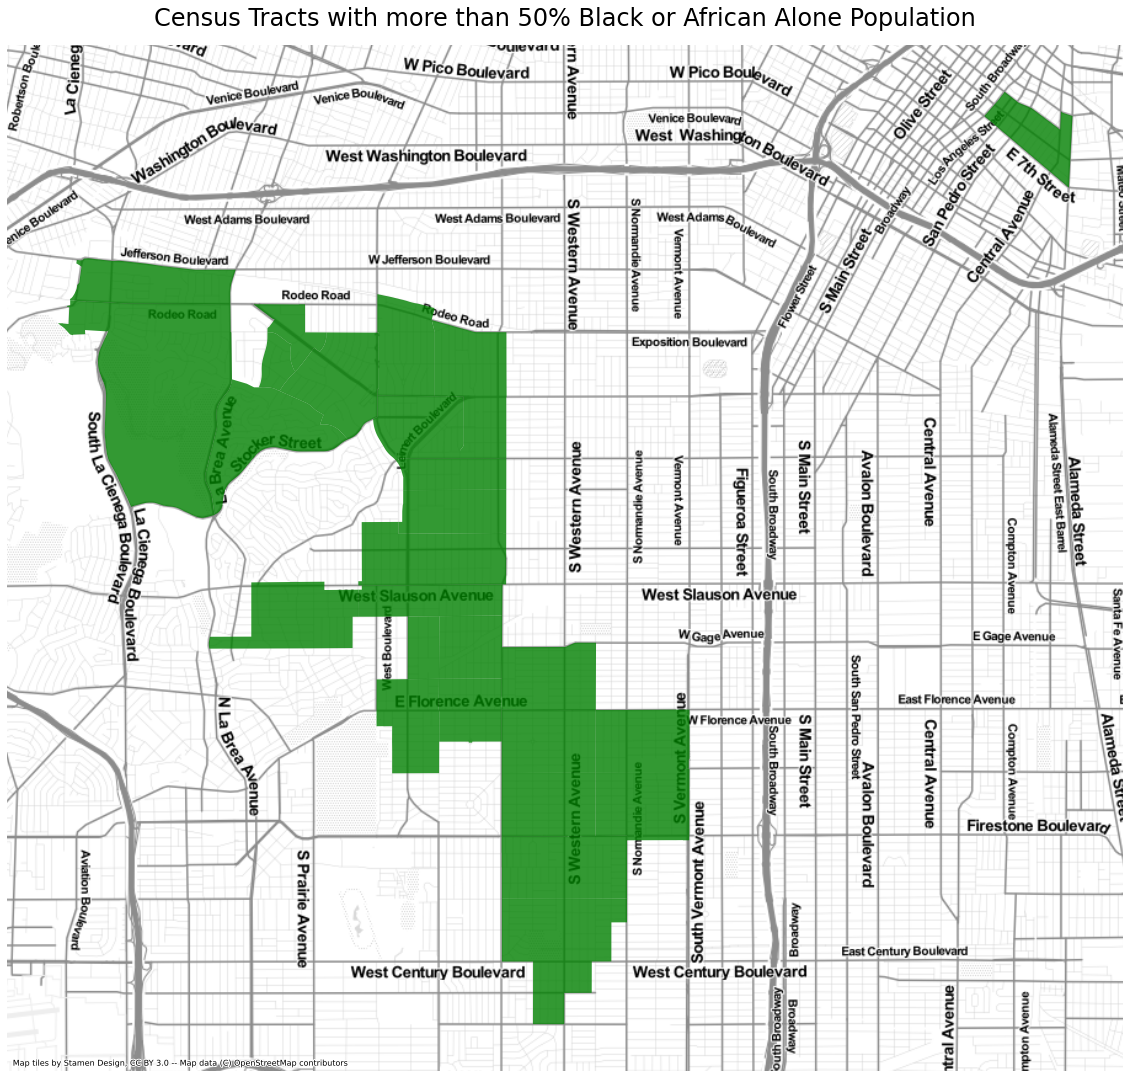

In [84]:
fig, ax = plt.subplots(figsize=(20, 20))

gdf_web_mercator[gdf_web_mercator['Percent Black of African alone'] > 50].plot(ax=ax, 
                                                                           alpha=0.8, 
                                                                           color="green")
ax.axis('off')

ax.set_title('Census Tracts with more than 50% Black or African Alone Population',fontsize=24, pad=20)

ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)